In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from main import NeuralNetwork

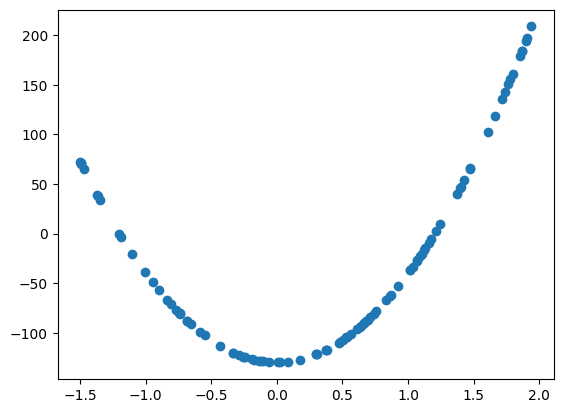

In [2]:
df = pd.read_csv("../data/regression/square-simple-training.csv")
df.drop(df.columns[0], axis=1, inplace=True)
# print(df.head())
plt.scatter(df['x'], df['y'])

# Normalized

In [7]:
df_normalized = df.copy()
df_normalized['x'] = (df['x'] - df['x'].mean()) / df['x'].std()
df_normalized['y'] = (df['y'] - df['y'].mean()) / df['y'].std()

matrix_1 = np.random.normal(loc=0, size=(1, 10))
matrix_2 = np.random.normal(loc=0, size=(10, 1))

while np.any(matrix_1 == 0) or np.any(matrix_2==0):
    matrix_1 = np.random.normal(loc=0, size=(1, 10))
    matrix_2 = np.random.normal(loc=0, size=(10, 1))

weights = [matrix_1, matrix_2]
biases = [np.random.normal(loc=0, size=(1, 10)), np.random.normal(loc=0, size=(1, 1))]

print(biases)


NN = NeuralNetwork(1, [10], weights=weights, biases=biases)

# NN.gradient_descent(df['x'], df['y'], batch_size=15, learning_rate=0.1, verbose=True)
# NN.gradient_descent(pd.Series([-0.5,0,0.5]),pd.Series([0.25,0,0.25]), batch_size=2, learning_rate=0.1, verbose=True)
# NN.fit(df_normalized['x'], df_normalized['y'], batch_size=10, learning_rate=0.5, epochs=1000, verbose=False)

[array([[ 1.25216735, -0.47595152, -0.89195307, -1.24178707, -0.08758117,
        -0.27438845, -0.91046899,  1.06479074,  0.24736758,  0.18434928]]), array([[-0.94985717]])]


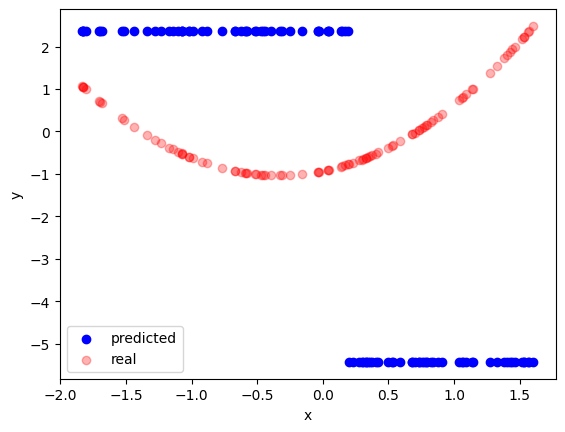

In [9]:
y_pred = [NN.predict(x) for x in df_normalized['x']]

fig, ax = plt.subplots()
ax.scatter(df_normalized['x'], y_pred, color='blue')
ax.scatter(df_normalized['x'], df_normalized['y'], alpha=0.3, color='red')
ax.set(xlabel='x', ylabel='y')
ax.legend(['predicted', 'real'])
plt.show()